## Theoretical Myopic and Hyperopic Defocus

Note that this section is not in Goodman and is just me deriving things.

In order to obtain a clear image at infinity, a photo-detector must be placed behind a lens at the distance where parallel incoming rays converge. By photo-detector we mean any image capturing device, such as a CCD, a film, or a bioligical retina. When the photo-detector is placed too close or too far, the image will start to become blurry. But how blurry exactly?

Since we want our results to generalize to the human eye, we also need to track index of refractions carefully. We use a simplified model as follows. Light starts in free space, passes through a lens with focal length $f$ and aperture diameter $d$, passes into a new material with index-of-refraction $n$, then travels a distance $z=L+\Delta L$ before hitting a photo-detector, where $L$ is the true convergence distance and $\Delta L$ is the error in photo-detector placement.

For a photo-detector placed at the convergence distance $L$, each angle of incoming light should theoretically converge to an infinitesimal point. However, the incorrect placement at $\Delta L$ causes light to spread out into a cone with angle $\alpha$ and vertical spread $\Delta y$. For small angles we have $\alpha = \Delta y / \Delta L$.

By ray-tracing the edges of this cone back through the convergence point $L$ towards the aperture edge $d$, we can also see that $\alpha = d/L$. Combining the two equations lets us elminate $\alpha$ and derive an expression for $\Delta y$:

$$\Delta y = d \frac{\Delta L}{L}$$

However, knowing the spread on a photo-detector in distance units isn't particularly useful, as intuitively the coordinates in an image have angular units. To convert this to an angular spread, we need to relate photo-detector positions to incoming ray angles.

Suppose we are at a height $y$ on the photo-detector. The angle of origination $\phi$ can be derived from a ray of light that passes through the free-space focal point, intersects a height $y$ on the lens, then travels straight towards the photo-detector. The index-of-refraction has no effect, since the ray is straight after passing through the lens. Since the lens inverts the image, we have the following relation:

$$\phi = -y/f$$

This relation implies the angular spread is given by:

$$\Delta \phi = -\frac{1}{f} \Delta y = -\frac{d}{f} \frac{\Delta L}{L}$$

This is useful as it relates errors in angular resolution to errors in axial length. However, an even more useful relation would with respect to errors in correction power. For instance, suppose we were curious what the world looked like with 0.25D of myopic blur. How would we calculate that?

Recall the definition of corrective power:

$$P = \frac{1}{f}$$

We need to write this in terms of $L$ in order to derive how errors in $\Delta L$ relate to errors in $\Delta P$. Therefore we need to derive a relation between $f$ and $L$.

Suppose an incoming straight ray intersects the lens at height $y$. Let $\theta_0$ be the angle it would have bent in free space, and $\theta$ be the true angle in the new medium. Assuming small angles we have:

$$\theta_0 = \frac{y}{f}, \theta = \frac{y}{L}$$

We can relate these two angles using Snells Law:

$$\theta_0 = n \theta$$

This implies:

$$\frac{y}{f} = n \frac{y}{L} \implies \frac{1}{f} = \frac{n}{L}$$

Therefore the relation between $P$ and $L$ becomes:

$$P = \frac{n}{L}$$

We can use this expression to relate errors in photo-detector distance to errors in corrective power. By taking the derivative and approximating with differentials we get the following:

$$\frac{dP}{dL} = -\frac{n}{L^2}$$

$$\Delta P = -\frac{n}{L} \frac{\Delta L}{L}$$

$$\frac{\Delta L}{L} = -\frac{L}{n} \Delta P = -f \Delta P$$

Substituting this into the expression for $\Delta \phi$ gives us a nice simplified expression:

$$\Delta \phi = d \Delta P$$

According to Google the pupil size is anywhere from 2-8mm depending on lighting conditions. When converting this equation into arc-minutes we get around 3.4 arc-minutes per (mm diopter), so a quarter diopter of refractive error would result in around 1.7 - 6.9 arc-minutes of angular blur depending on lighting conditions. This seems about right, given the 20/20 line is 5 arc-minutes tall, and anecdotally people can read 20/20 with slight under-correction in bright lighting but not dim lighting.

# Simulating Myopic Defocus

The image below is an example of a Snellen Chart taken from the [Reduced Lens Wiki](https://wiki.reducedlens.org/wiki/Snellen_chart). The 20/20 line in this chart is 28 pixels tall and represents 5 arc-minutes of blur. Therefore we can use a 28/5 ratio when scaling arc-minutes into pixels to do a blur convolution. It's possible to do custom convolutions in python with [opencv](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html#d-convolution-image-filtering).

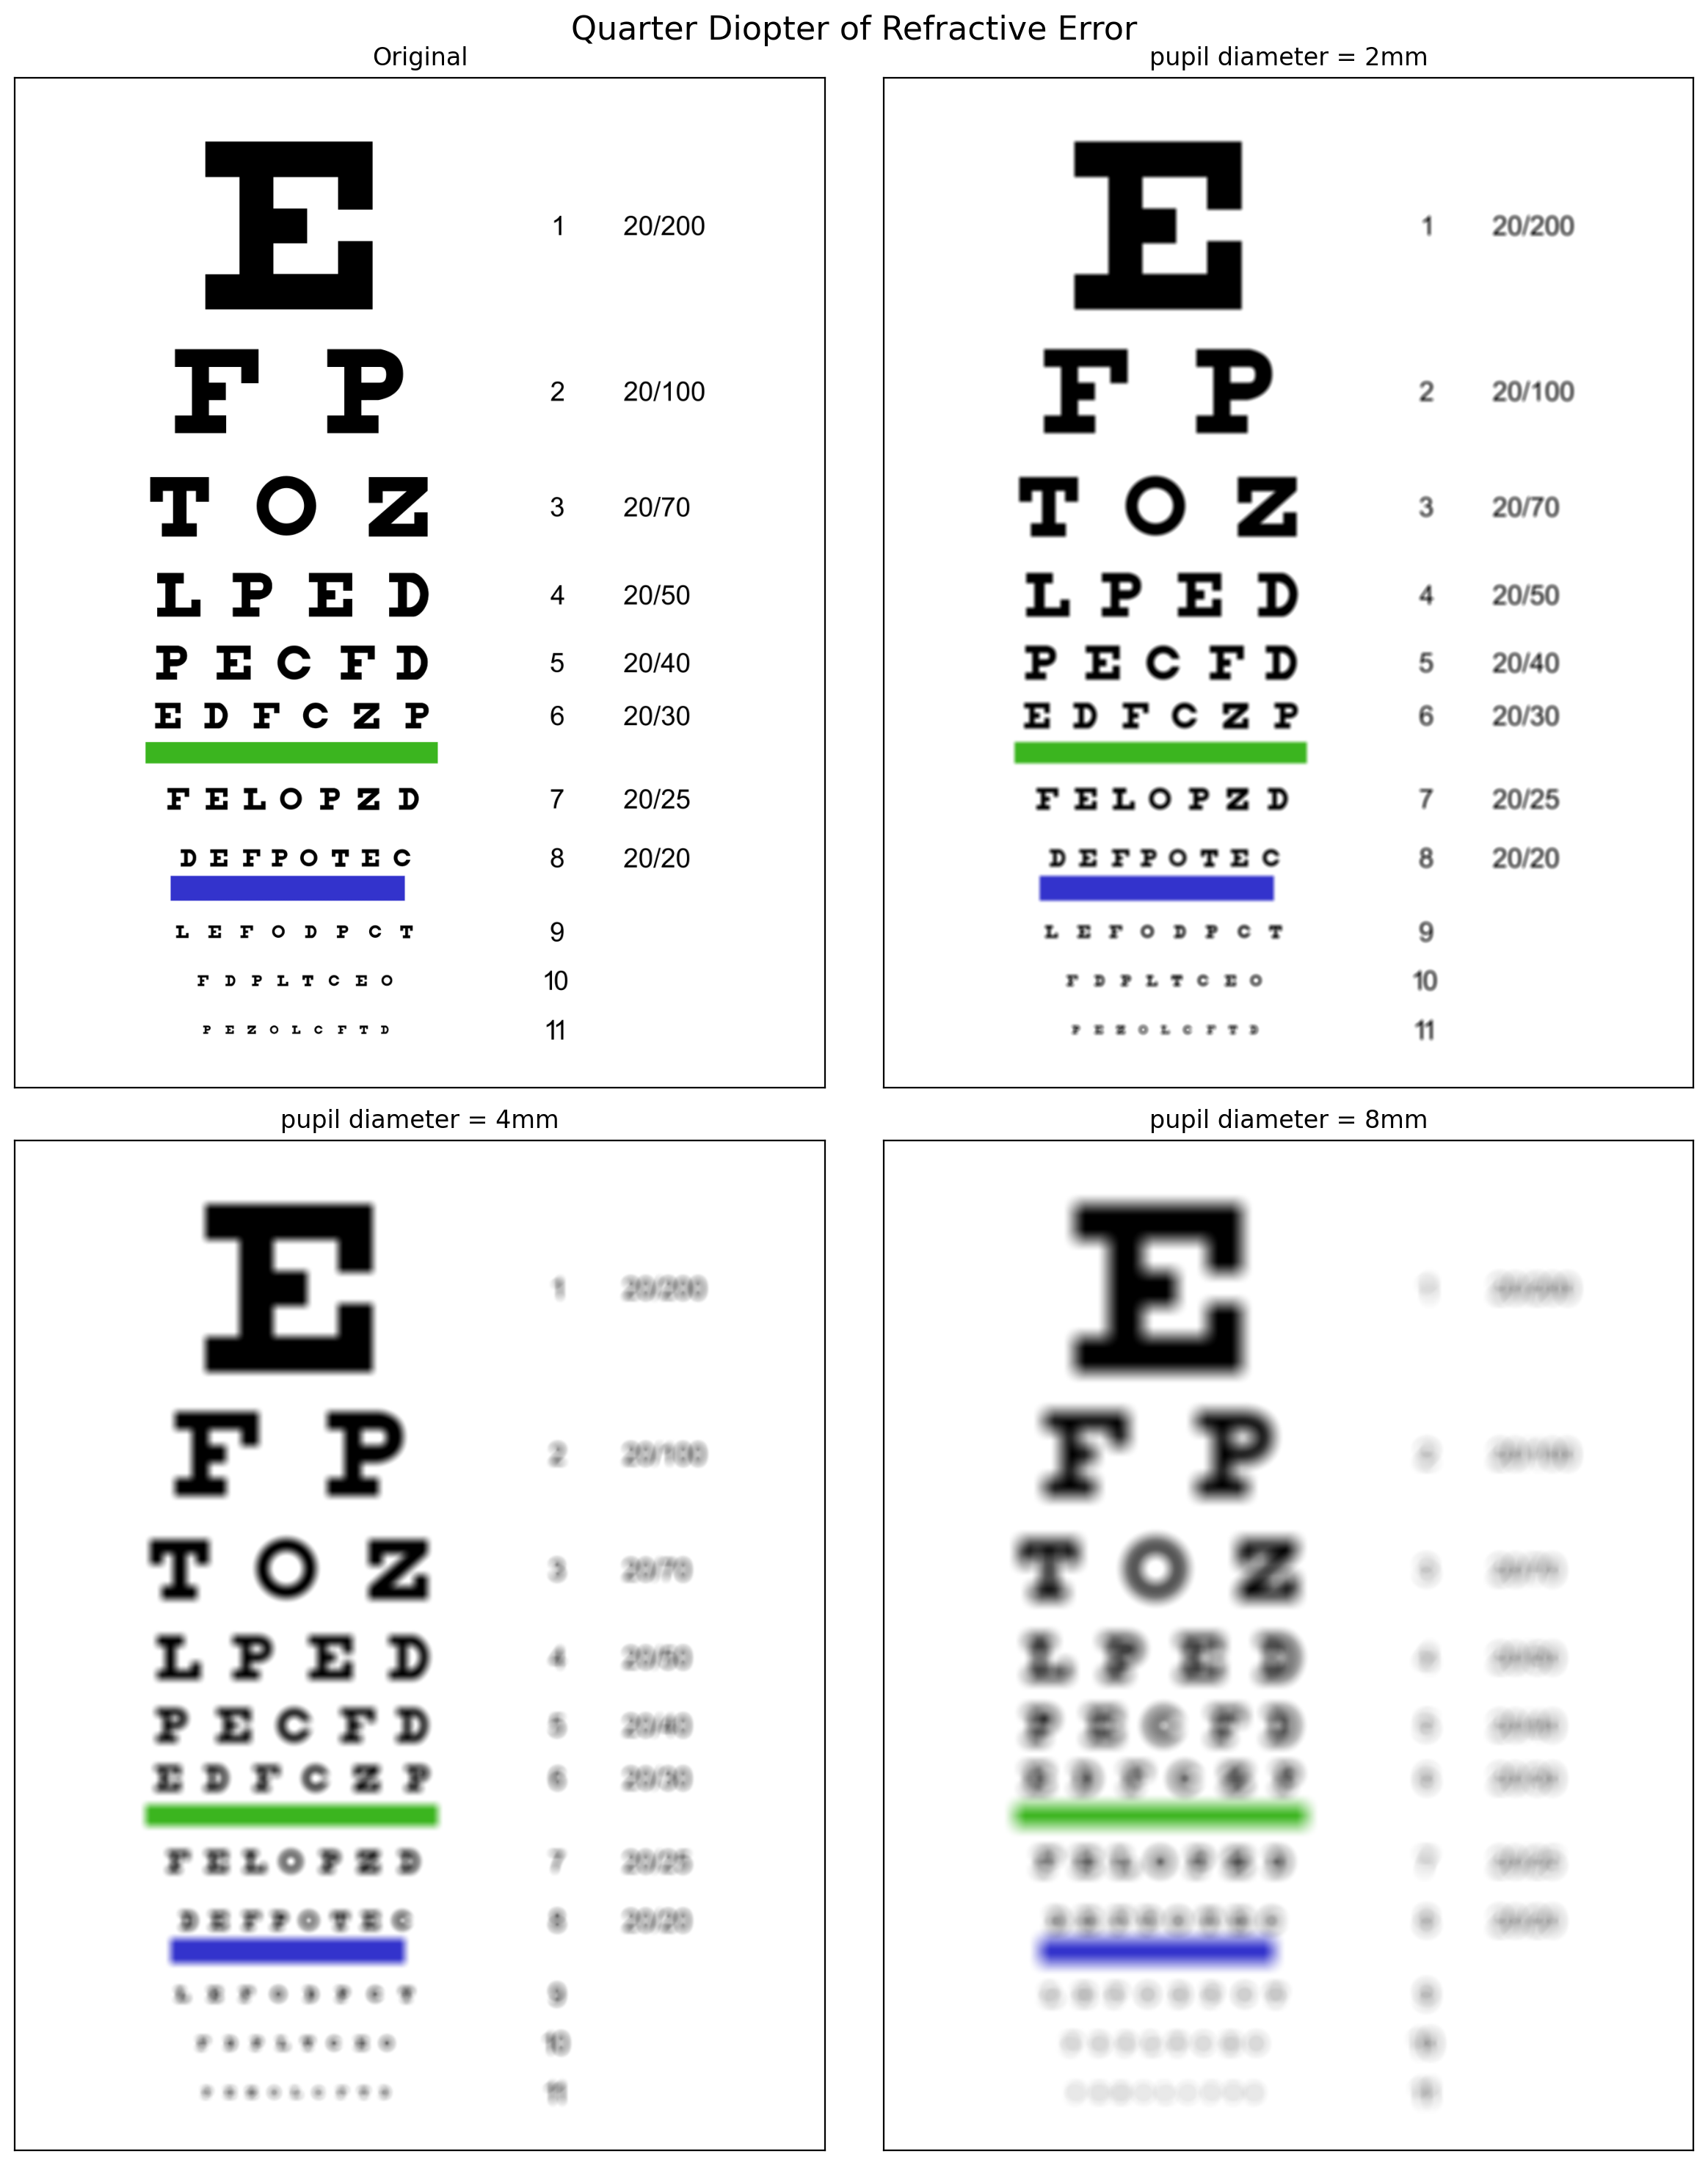

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('images/Snellen_chart.png')

pupils = [.002, .004, .008]
diopters = 0.25
rad2am = 360 / (2*np.pi) * 60
am2px = 28/5

plt.figure(figsize=(12,15), dpi=200)
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

for i,pupil in enumerate(pupils):
    d = int(pupil * diopters * rad2am * am2px)
    kernel = np.zeros((d,d),np.float32)
    r = d/2
    idx = np.linspace(-1, 1, d)
    delta = 2/(d-1)
    x,y = np.mgrid[-1:1+delta:delta, -1:1+delta:delta]
    kernel[(x**2+y**2<=1)] = 1
    kernel /= kernel.sum()
    dst = cv2.filter2D(img,-1,kernel)
    plt.subplot(220+i+2),plt.imshow(dst),plt.title(f'pupil diameter = {int(pupil*1000)}mm')
    plt.xticks([]), plt.yticks([])
plt.suptitle('Quarter Diopter of Refractive Error', fontsize=16)
plt.tight_layout()
plt.savefig('images/myopic_defocus.png')
plt.show()